In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Load dataset
df = pd.read_csv("ACS_5_Year_Data_by_Community_Area.csv")

# Display first few rows
df.head()

,ACS Year,Community Area,"Under $25,000","$25,000 to $49,999","$50,000 to $74,999","$75,000 to $125,000","$125,000 +",Male 0 to 17,Male 18 to 24,Male 25 to 34,Male 35 to 49,Male 50 to 64,Male 65+,Female 0 to 17,Female 18 to 24,Female 25 to 34,Female 35 to 49,Female 50 to 64,Female 65 +,Total Population,White,Black or African American,American Indian or Alaska Native,Asian,Native Hawaiian or Pacific Islander,Other Race,Multiracial,White Not Hispanic or Latino,Hispanic or Latino,Record ID
0,2023,ALBANY PARK,1269,1916,1801,2306,3379,4799,2955,4513,5442,4354,2287,4913,2405,4116,5228,3764,3054,47830,21496,2228,759,7124,1,7888,8334,16115,21108,2023_ALBANY PARK
1,2023,ARCHER HEIGHTS,223,752,441,795,739,1927,732,1102,1240,1417,1035,1502,899,978,1167,854,1021,13875,6232,10,108,679,0,3705,3142,2043,11097,2023_ARCHER HEIGHTS
2,2023,ARMOUR SQUARE,701,798,370,637,597,1300,487,871,1174,1177,1032,1022,517,965,1163,1378,2063,13149,2556,1487,107,8402,61,212,325,2226,565,2023_ARMOUR SQUARE
3,2023,ASHBURN,797,1351,1985,3014,2735,5150,1964,2881,4178,4228,2473,5138,2248,2774,4582,4044,3184,42842,11297,18124,697,436,0,7772,4517,3774,19917,2023_ASHBURN
4,2023,AUBURN GRESHAM,2541,2451,1592,2202,1850,5803,1836,2964,3431,3469,3223,5305,2304,3057,4522,5213,5357,46483,760,43414,119,399,0,993,798,491,1577,2023_AUBURN GRESHAM


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       ACS Year  Under $25,000  $25,000 to $49,999  $50,000 to $74,999  ...    Other Race   Multiracial  White Not Hispanic or Latino  Hispanic or Latino
count      77.0      77.000000           77.000000           77.000000  ...     77.000000     77.000000                     77.000000           77.000000
mean     2023.0     987.883117         1266.155844         1005.831169  ...   3972.870130   3376.896104                  11114.142857        10170.207792
std         0.0     822.995923          993.091386          743.108184  ...   5171.590548   3285.634568                  14842.603069        12238.119782
min      2023.0      31.000000          104.000000           36.000000  ...      0.000000    143.000000                     18.000000           48.000000
25%      2023.0     361.000000          571.000000          441.000000  ...    494.000000    818.000000                    995.000000         1334.000000
50%      2023.0     797.000000         1082.000000     

In [49]:
# Income distribution
income_cols = [
    "Under $25,000",
    "$25,000 to $49,999",
    "$50,000 to $74,999",
    "$75,000 to $125,000",
    "$125,000 +"
]

df_income = df[income_cols].sum()
df_income.head()


Under $25,000           76067
$25,000 to $49,999      97494
$50,000 to $74,999      77449
$75,000 to $125,000    116732
$125,000 +             197641
dtype: int64

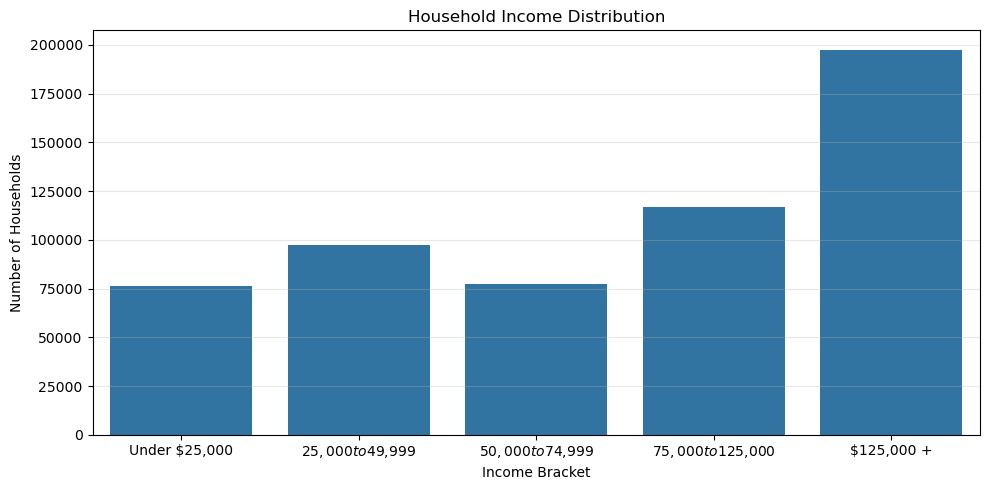

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_income.index, y=df_income.values)
plt.title("Household Income Distribution")
plt.xlabel("Income Bracket")
plt.ylabel("Number of Households")
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

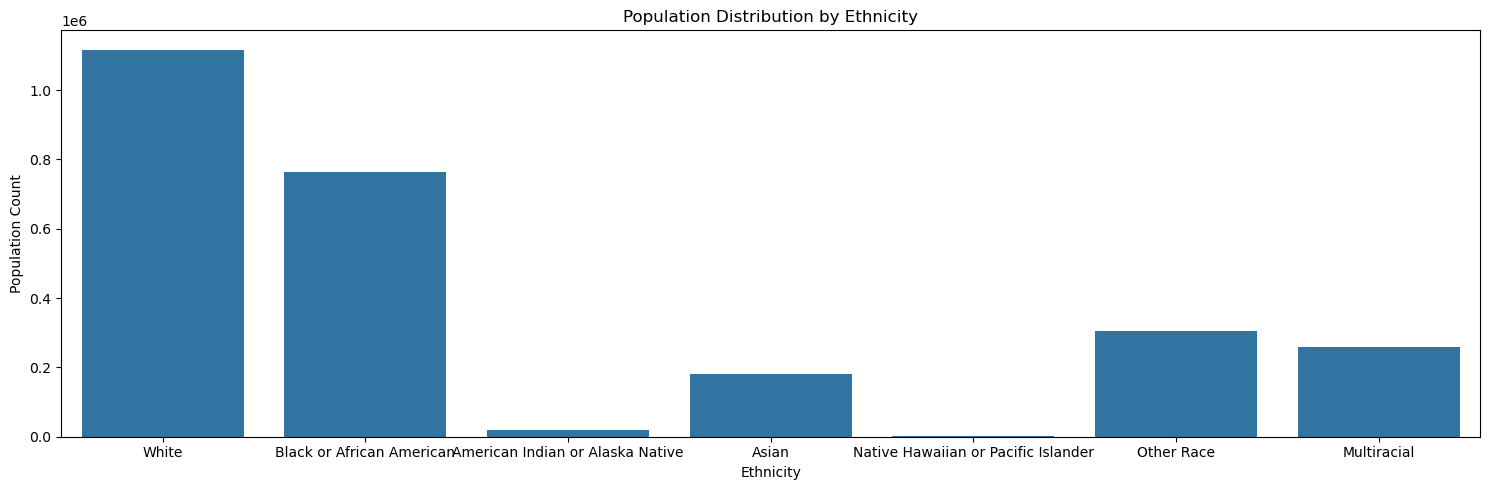

In [51]:
# Population distribution by ethnicity
ethnicity_cols = ["White", "Black or African American", "American Indian or Alaska Native", "Asian", 
                  "Native Hawaiian or Pacific Islander", "Other Race", "Multiracial"]
df_ethnicity = df[ethnicity_cols].sum()

plt.figure(figsize=(15, 5))
sns.barplot(x=df_ethnicity.index, y=df_ethnicity.values)
plt.title("Population Distribution by Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Population Count")
plt.tight_layout()

plt.show()

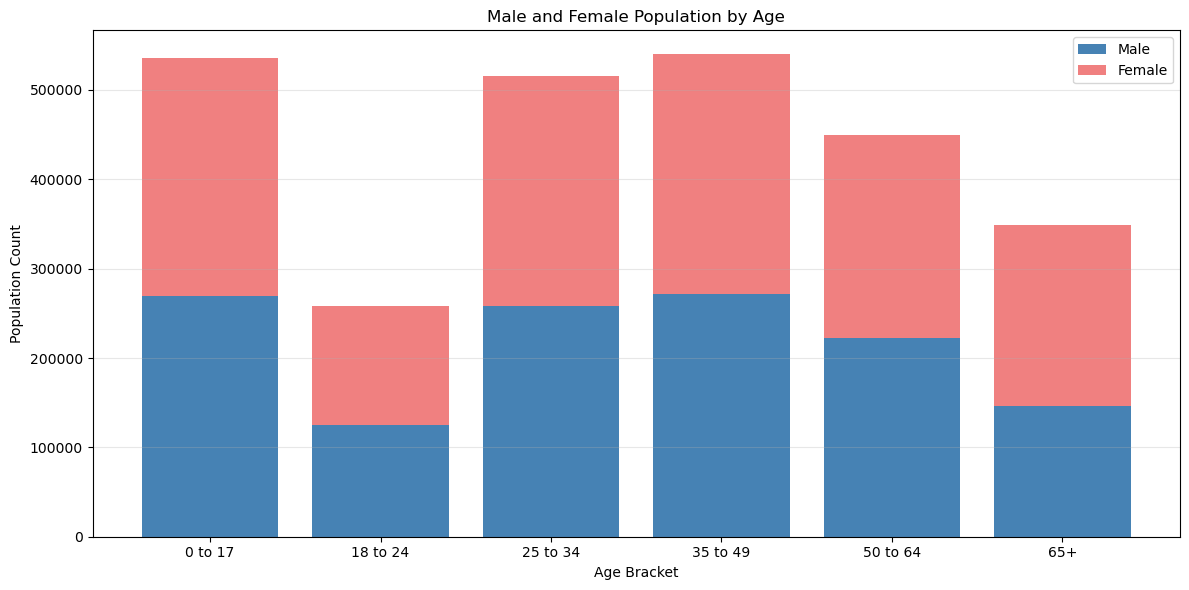

In [ ]:
# Gender totals and distribution

df["Male_Total"] = df[["Male 0 to 17", "Male 18 to 24", "Male 25 to 34",
                       "Male 35 to 49", "Male 50 to 64", "Male 65+"]].sum(axis=1)

df["Female_Total"] = df[["Female 0 to 17", "Female 18 to 24", "Female 25 to 34",
                         "Female 35 to 49", "Female 50 to 64", "Female 65 +"]].sum(axis=1)

df["Percent_Female"] = df["Female_Total"] / df["Total Population"] * 100
df["Percent_Male"] = df["Male_Total"] / df["Total Population"] * 100

male_age = ["Male 0 to 17", "Male 18 to 24", "Male 25 to 34",
                 "Male 35 to 49", "Male 50 to 64", "Male 65+"]

female_age = ["Female 0 to 17", "Female 18 to 24", "Female 25 to 34",
                   "Female 35 to 49", "Female 50 to 64", "Female 65 +"]

age_groups = ["0 to 17", "18 to 24", "25 to 34", "35 to 49", "50 to 64", "65+"]

male_counts = df[male_age].sum().values
female_counts = df[female_age].sum().values

x = np.arange(len(age_groups))  # the label locations

plt.figure(figsize=(12,6))

plt.bar(x, male_counts, label="Male", color="steelblue")
plt.bar(x, female_counts, bottom=male_counts, label="Female", color="lightcoral")

plt.xticks(x, age_groups)
plt.xlabel("Age Bracket")
plt.ylabel("Population Count")
plt.title("Male and Female Population by Age")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


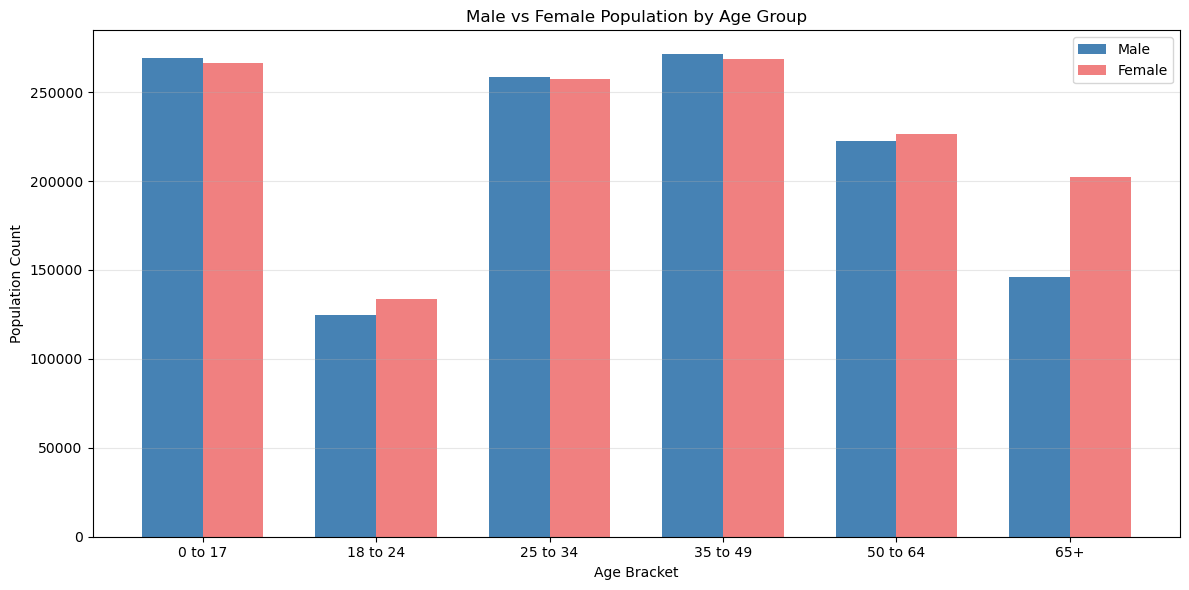

In [52]:
# Define age-by-gender columns
male_age_cols = [
    "Male 0 to 17", "Male 18 to 24", "Male 25 to 34",
    "Male 35 to 49", "Male 50 to 64", "Male 65+"
]

female_age_cols = [
    "Female 0 to 17", "Female 18 to 24", "Female 25 to 34",
    "Female 35 to 49", "Female 50 to 64", "Female 65 +"
]

# Compute total males and females per community area
df["Male_Total"] = df[male_age_cols].sum(axis=1)
df["Female_Total"] = df[female_age_cols].sum(axis=1)

# Compute gender percentages
df["Percent_Female"] = df["Female_Total"] / df["Total Population"] * 100
df["Percent_Male"] = df["Male_Total"] / df["Total Population"] * 100

# Total male and female counts by age category (citywide)
age_groups = ["0 to 17", "18 to 24", "25 to 34", "35 to 49", "50 to 64", "65+"]

male_counts = df[male_age_cols].sum().values
female_counts = df[female_age_cols].sum().values

# Create side-by-side bar chart
x = np.arange(len(age_groups))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, male_counts, width, label="Male", color="steelblue")
plt.bar(x + width/2, female_counts, width, label="Female", color="lightcoral")

plt.xticks(x, age_groups)
plt.xlabel("Age Bracket")
plt.ylabel("Population Count")
plt.title("Male vs Female Population by Age Group")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

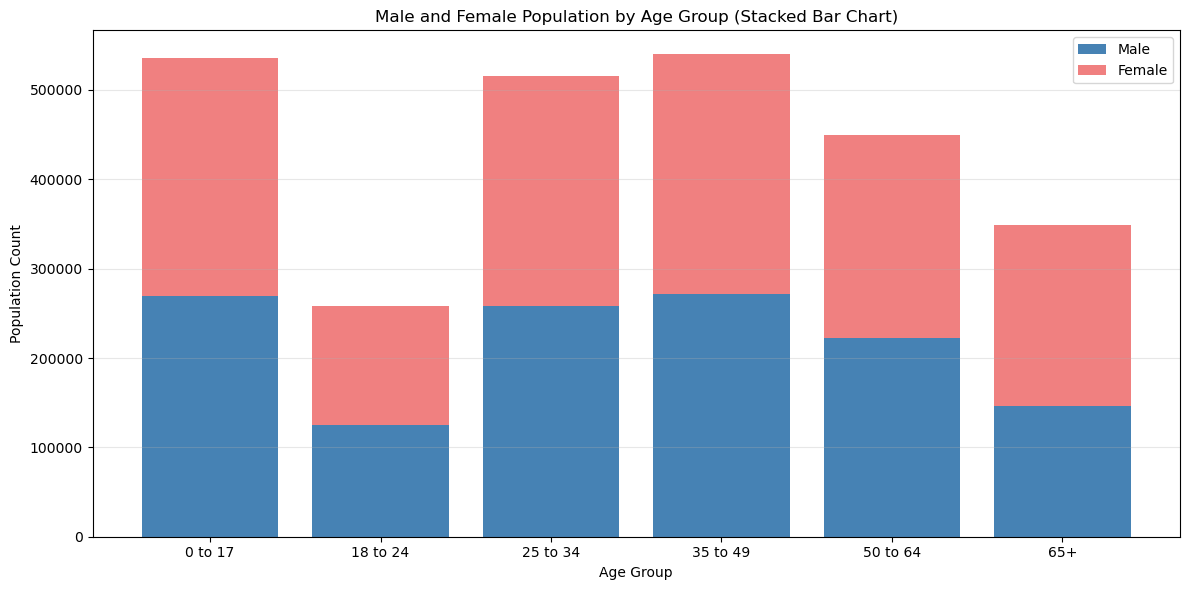

In [53]:
x = np.arange(len(age_groups))  # the label locations

plt.figure(figsize=(12,6))

# Bottom bar = male
plt.bar(x, male_counts, label="Male", color="steelblue")

# Top bar = female (stacked on male)
plt.bar(x, female_counts, bottom=male_counts, label="Female", color="lightcoral")

# Formatting
plt.xticks(x, age_groups)
plt.xlabel("Age Group")
plt.ylabel("Population Count")
plt.title("Male and Female Population by Age Group (Stacked Bar Chart)")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

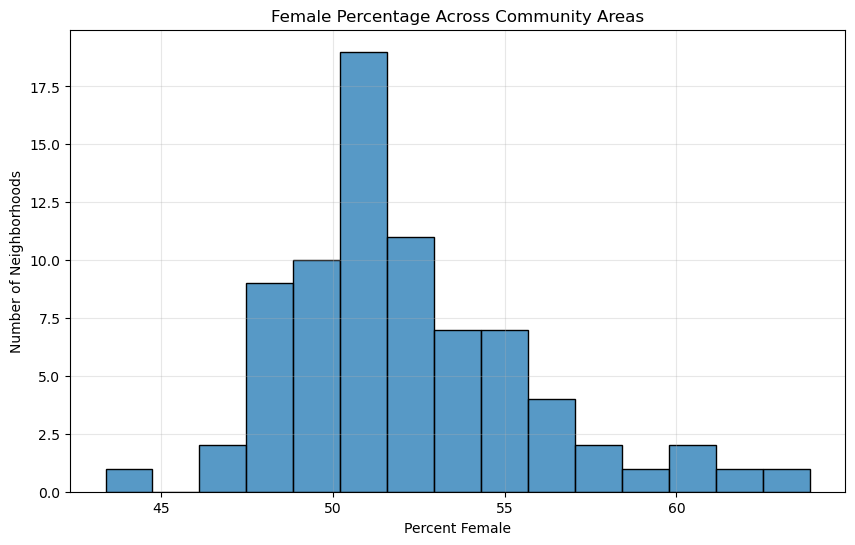

In [55]:
plt.figure(figsize=(10,6))
sns.histplot(df["Percent_Female"], bins=15)

plt.title("Female Percentage Across Community Areas")
plt.xlabel("Percent Female")
plt.ylabel("Number of Neighborhoods")
plt.grid(True, alpha=0.3)

plt.show()



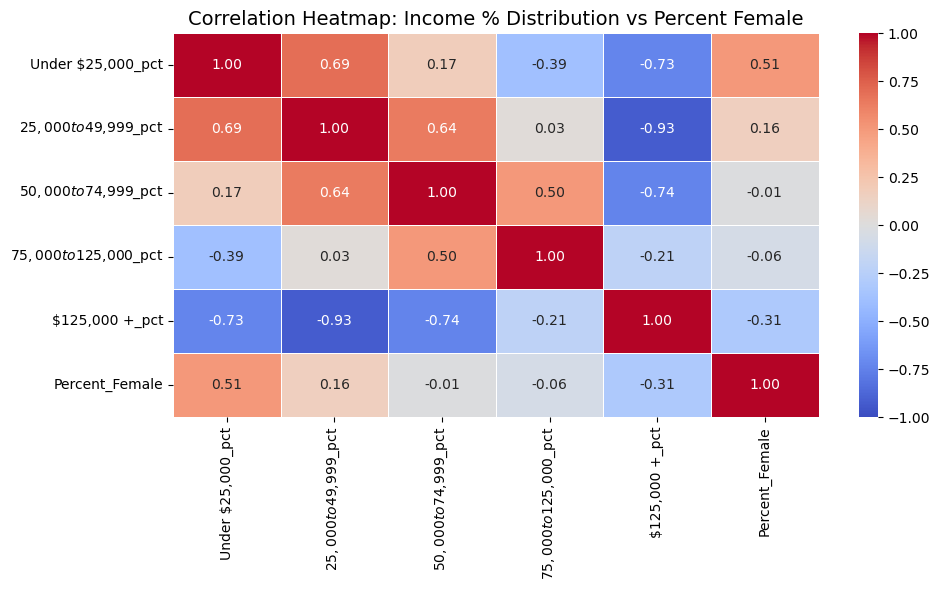

In [58]:
# Correlation heatmap 

heatmap_df = df[pct_cols + ["Percent_Female"]]

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_df.corr(),
    annot=True,
    cmap="coolwarm",
    vmin=-1, vmax=1,
    linewidths=0.5,
    fmt=".2f"
)

plt.title("Correlation Heatmap: Income % Distribution vs Percent Female", fontsize=14)
plt.tight_layout()
plt.show()


In [62]:
def run_regression(y_col_name, alpha=0.05):
    X = df["Percent_Female"].values
    Y = df[y_col_name].values

    X_with_const = sm.add_constant(X)
    model = sm.OLS(Y, X_with_const)
    results = model.fit()

    print("="*80)
    print(f"Regression for: {y_col_name}")
    print("="*80)
    print(results.summary())

    beta_1 = results.params[1]
    se_beta_1 = results.bse[1]
    t_statistic = beta_1 / se_beta_1
    df_slope = len(X) - 2
    p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df_slope))

    print(f"\nt-statistic: {t_statistic}")
    print(f"p-value: {p_value}")

    if p_value < alpha:
        print("\nWe reject H0: There is a significant relationship "
              f"between Percent Female and {y_col_name}.")
    else:
        print("\nWe fail to reject H0: There is no significant relationship "
              f"between Percent Female and {y_col_name}.")

# Run for each income percentage column:
for col in pct_cols:   # pct_cols = [col + "_pct" for col in income_cols]
    run_regression(col)


Regression for: Under $25,000_pct
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     25.71
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           2.77e-06
Time:                        11:47:21   Log-Likelihood:                -277.88
No. Observations:                  77   AIC:                             559.8
Df Residuals:                      75   BIC:                             564.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.4

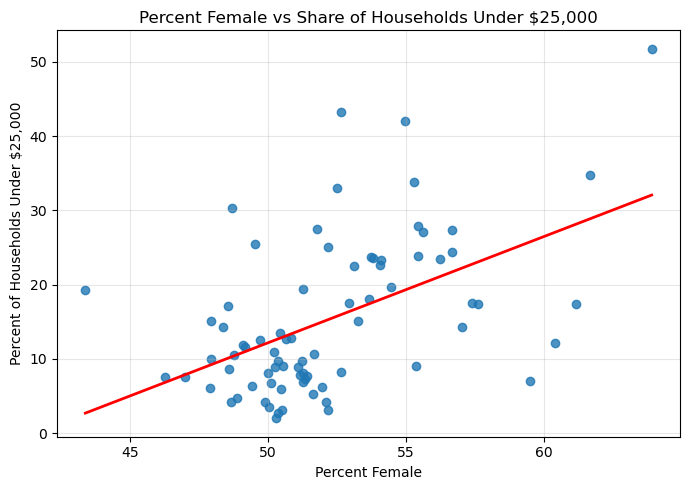

In [63]:
plt.figure(figsize=(7,5))
sns.regplot(
    data=df,
    x="Percent_Female",
    y="Under $25,000_pct",
    ci=None,  
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("Percent Female vs Share of Households Under $25,000")
plt.xlabel("Percent Female")
plt.ylabel("Percent of Households Under $25,000")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

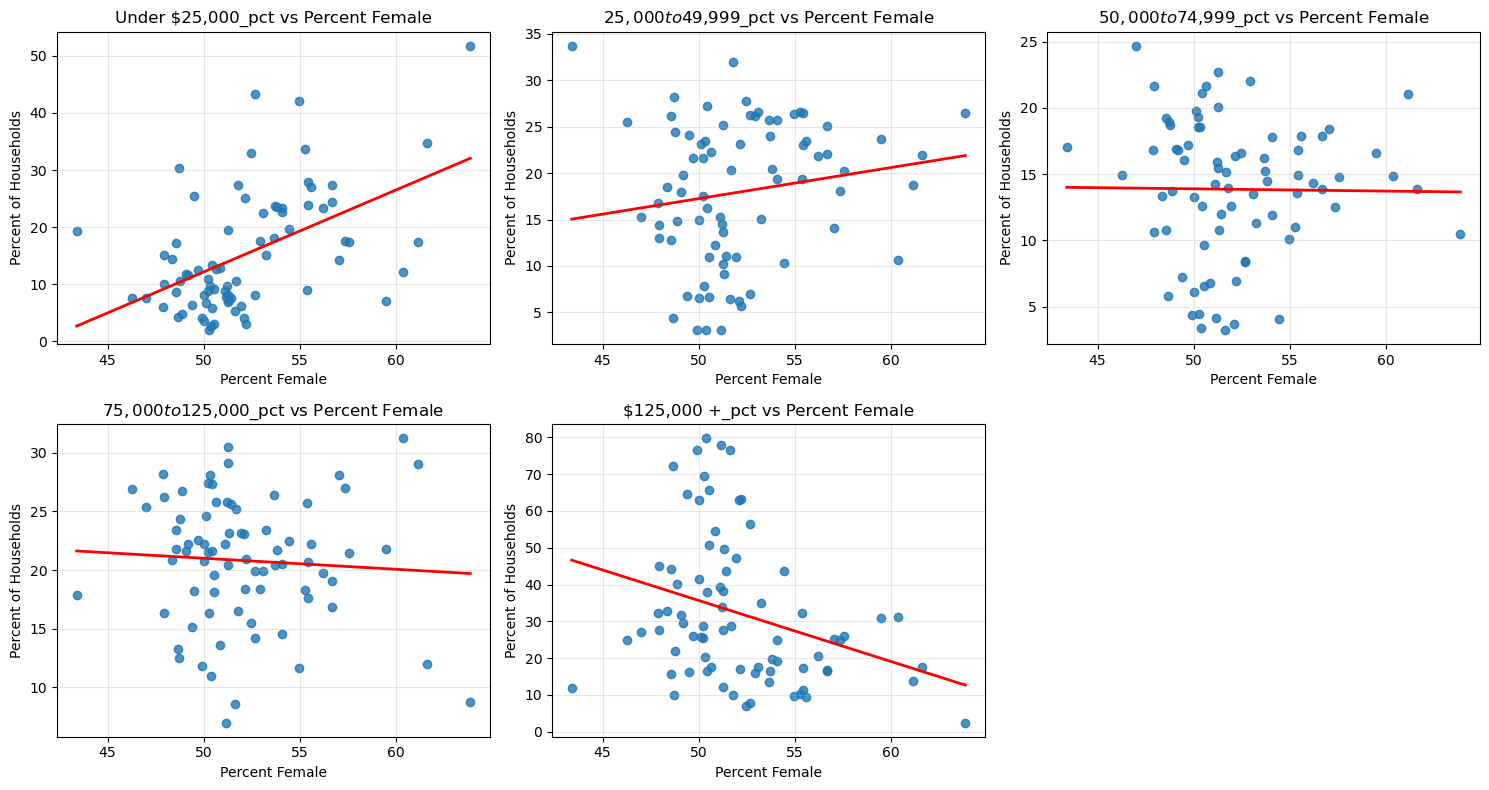

In [64]:

pct_cols = [col + "_pct" for col in income_cols]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, y_col in enumerate(pct_cols):
    ax = axes[i]
    sns.regplot(
        data=df,
        x="Percent_Female",
        y=y_col,
        ci=None,
        ax=ax,
        line_kws={"color": "red", "linewidth": 2}  # 🔹 Regression line in red
    )
    ax.set_title(y_col + " vs Percent Female")
    ax.set_xlabel("Percent Female")
    ax.set_ylabel("Percent of Households")
    ax.grid(True, alpha=0.3)

# Hide the unused 6th subplot
axes[-1].axis("off")

plt.tight_layout()
plt.show()